In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [0]:

#Used to plot data in csv
def plot_points(X,y):
  plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
  plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.grid(False)
  plt.tick_params(
      axis='x',
      which='both',
      bottom=False,
      top=False)
  plt.show()

In [0]:

#Used to plot the resulting model
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which=False,
        bottom=False,
        top=False)

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

In [0]:
df = pd.read_csv("data.csv")


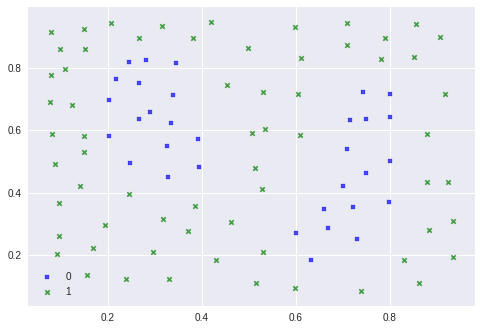

In [10]:
from mlxtend.plotting import category_scatter
fig = category_scatter(x='x1', y='x2', label_col='y', data=df)

In [0]:
X = np.array(df[['x1','x2']])
y = np.array(df['y'])

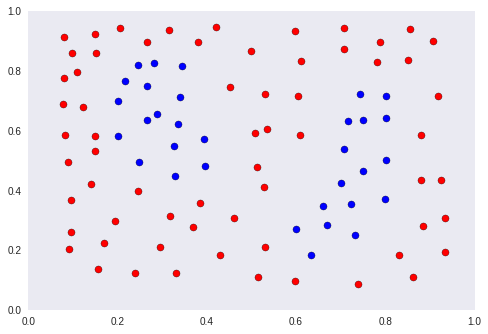

In [15]:
plot_points(X,y)

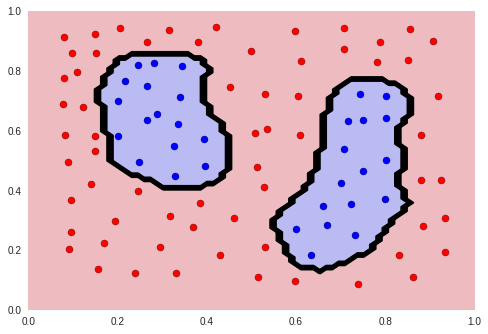

In [28]:
# Support Vector Machine Classifier
classifier = SVC(kernel = 'rbf', gamma = 200)
classifier.fit(X,y)
plot_model(X,y,classifier)
